## Učitavanje potrebnih biblioteka

In [53]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Analiza podataka i pretprocesiranje

In [55]:
# NAPOMENA: Potrebno je sačuvati dataset na željenoj lokaciji na Google Drive servisu 
#           i zameniti adresni string, kako bi dataset bio uspešno učitan.
survey = pd.read_excel("/content/gdrive/My Drive/Colab Notebooks/datasets/it_survey_flatend_fixed.xlsx")

In [56]:
print("Broj instanci u skupu podataka: ", survey.shape[0])
print("Broj atributa(kolona): ", survey.shape[1])
print("Nazivi atributa:")
for col in survey.columns:
  print(col)

Broj instanci u skupu podataka:  203
Broj atributa(kolona):  25
Nazivi atributa:
position
experience
department_size
industry_sector
location
delivery_time_opinion
finance_opinion
functionality_opinion
delivery_quality_opinion
priority_stack_time
priority_stack_money
priority_stack_functionality
priority_stack_quality
adhoc_successful
adhoc_challenged
adhoc_failed
iterative_successful
iterative_challenged
iterative_failed
agile_successful
agile_challenged
agile_failed
traditional_succesful
traditional_challenged
traditional_failed


In [57]:
print('Nedostajuće vrednosti po atributima: \n')
survey.isna().sum()

Nedostajuće vrednosti po atributima: 



position                         0
experience                       0
department_size                  0
industry_sector                  0
location                         0
delivery_time_opinion           13
finance_opinion                 13
functionality_opinion           13
delivery_quality_opinion        13
priority_stack_time             16
priority_stack_money            16
priority_stack_functionality    16
priority_stack_quality          15
adhoc_successful                19
adhoc_challenged                19
adhoc_failed                    19
iterative_successful            27
iterative_challenged            27
iterative_failed                27
agile_successful                32
agile_challenged                32
agile_failed                    32
traditional_succesful           34
traditional_challenged          34
traditional_failed              34
dtype: int64

In [58]:
survey = survey.dropna()
print("Broj instanci nakon uklanjanja NA vrednosti: ", survey.shape[0])
print('Pregled nedostajućih vrednosti nakon uklanjanja istih: \n')
survey.isna().sum()

Broj instanci nakon uklanjanja NA vrednosti:  160
Pregled nedostajućih vrednosti nakon uklanjanja istih: 



position                        0
experience                      0
department_size                 0
industry_sector                 0
location                        0
delivery_time_opinion           0
finance_opinion                 0
functionality_opinion           0
delivery_quality_opinion        0
priority_stack_time             0
priority_stack_money            0
priority_stack_functionality    0
priority_stack_quality          0
adhoc_successful                0
adhoc_challenged                0
adhoc_failed                    0
iterative_successful            0
iterative_challenged            0
iterative_failed                0
agile_successful                0
agile_challenged                0
agile_failed                    0
traditional_succesful           0
traditional_challenged          0
traditional_failed              0
dtype: int64

In [59]:
survey.dtypes # object - pointers to strings

position                        object
experience                      object
department_size                 object
industry_sector                 object
location                        object
delivery_time_opinion           object
finance_opinion                 object
functionality_opinion           object
delivery_quality_opinion        object
priority_stack_time             object
priority_stack_money            object
priority_stack_functionality    object
priority_stack_quality          object
adhoc_successful                object
adhoc_challenged                object
adhoc_failed                    object
iterative_successful            object
iterative_challenged            object
iterative_failed                object
agile_successful                object
agile_challenged                object
agile_failed                    object
traditional_succesful           object
traditional_challenged          object
traditional_failed              object
dtype: object

In [60]:
for col in survey.columns:
  print('-----------------------------------\n' + col + ':')
  print(survey[col].unique())

-----------------------------------
position:
['Agile Team Member' 'Project Manager' 'Scrum Master/Team Lead'
 'Business Analyst' 'Operations/Support' 'Other' 'Programmer'
 'Architect/Architecture Owner' 'QA/Test' 'IT Manager' 'Product Owner'
 'Business Stakeholder']
-----------------------------------
experience:
['10 to 20 years' '5 to 10 years' 'Less than 2 years' '20+ years'
 '2 to 5 years']
-----------------------------------
department_size:
['101 to 500' '1000+' '11 to 50' '51 to 100' '1 to 10' '501 to 1000']
-----------------------------------
industry_sector:
['Other' 'Technology (inc. Software)' 'IT Consulting' 'Government'
 'Manufacturing' 'Retail' 'Financial' 'Shipping']
-----------------------------------
location:
['South/Central America' 'Europe' 'Africa' 'Asia' 'North America'
 'Australia/NZ']
-----------------------------------
delivery_time_opinion:
['Delivering when the system is ready to be shipped'
 'Delivering on time according to the schedule' 'Not applicable']
-

In [61]:
survey.head(10)

,position,experience,department_size,industry_sector,location,delivery_time_opinion,finance_opinion,functionality_opinion,delivery_quality_opinion,priority_stack_time,priority_stack_money,priority_stack_functionality,priority_stack_quality,adhoc_successful,adhoc_challenged,adhoc_failed,iterative_successful,iterative_challenged,iterative_failed,agile_successful,agile_challenged,agile_failed,traditional_succesful,traditional_challenged,traditional_failed
1,Agile Team Member,10 to 20 years,101 to 500,Other,South/Central America,Delivering when the system is ready to be shipped,Providing good return on investment (ROI),Meeting the actual needs of stakeholders,Delivering systems on time and on budget,Second,Third,First,Fourth,31-40%,81-90%,61-70%,71-80%,51-60%,31-40%,81-90%,31-40%,1-10%,31-40%,71-80%,51-60%
4,Project Manager,5 to 10 years,101 to 500,Technology (inc. Software),Europe,Delivering on time according to the schedule,Delivering within budget,Meeting the actual needs of stakeholders,"Delivering high quality, easy to maintain systems",Third,Fourth,First,Second,21-30%,41-50%,11-20%,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,51-60%,21-30%,1-10%
6,Scrum Master/Team Lead,Less than 2 years,1000+,IT Consulting,Africa,Delivering on time according to the schedule,Delivering within budget,Meeting the actual needs of stakeholders,"Delivering high quality, easy to maintain systems",Second,First,Third,Fourth,61-70%,21-30%,11-20%,61-70%,21-30%,11-20%,51-60%,41-50%,21-30%,11-20%,51-60%,41-50%
8,Business Analyst,Less than 2 years,101 to 500,Technology (inc. Software),Europe,Delivering on time according to the schedule,Providing good return on investment (ROI),Meeting the actual needs of stakeholders,"Delivering high quality, easy to maintain systems",First,Third,Fourth,Second,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know
9,Project Manager,5 to 10 years,11 to 50,Government,Asia,Delivering when the system is ready to be shipped,Providing good return on investment (ROI),Meeting the actual needs of stakeholders,"Delivering high quality, easy to maintain systems",Third,Fourth,Second,First,61-70%,81-90%,11-20%,Don't Know,Don't Know,Don't Know,71-80%,61-70%,11-20%,81-90%,51-60%,11-20%
10,Scrum Master/Team Lead,20+ years,11 to 50,Other,North America,Delivering when the system is ready to be shipped,Delivering within budget,Meeting the actual needs of stakeholders,Delivering systems on time and on budget,First,Second,Third,Fourth,31-40%,51-60%,1-10%,61-70%,21-30%,0,71-80%,11-20%,0,41-50%,41-50%,0
12,Operations/Support,2 to 5 years,51 to 100,IT Consulting,Europe,Delivering on time according to the schedule,Delivering within budget,Meeting the actual needs of stakeholders,"Delivering high quality, easy to maintain systems",Fourth,Third,Second,First,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,61-70%,21-30%,11-20%
15,Other,10 to 20 years,1000+,IT Consulting,North America,Delivering on time according to the schedule,Providing good return on investment (ROI),Meeting the actual needs of stakeholders,"Delivering high quality, easy to maintain systems",First,Second,Third,Fourth,Don't Know,Don't Know,Don't Know,91-100%,1-10%,1-10%,Don't Know,Don't Know,Don't Know,31-40%,31-40%,31-40%
16,Project Manager,20+ years,1 to 10,Technology (inc. Software),North America,Delivering on time according to the schedule,Providing good return on investment (ROI),Meeting the actual needs of stakeholders,Delivering systems on time and on budget,First,Fourth,Second,Third,1-10%,21-30%,51-60%,71-80%,11-20%,0,41-50%,21-30%,11-20%,Don't Know,Don't Know,Don't Know
17,Programmer,20+ years,1 to 10,Manufacturing,North America,Delivering when the system is ready to be shipped,Delivering within budget,Meeting the actual needs of stakeholders,"Delivering high quality, easy to maintain systems",Fourth,Third,First,Second,91-100%

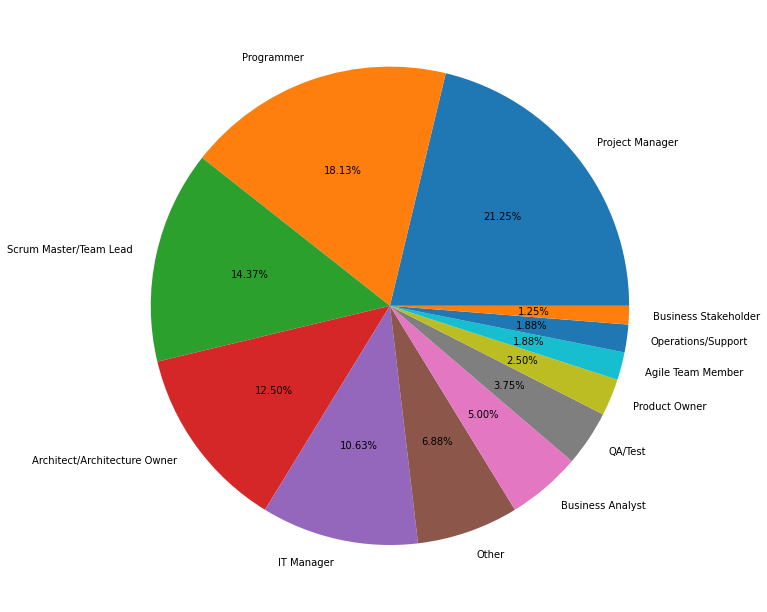

In [62]:
positions = survey.position.value_counts() 
plt.subplots(figsize=(11,11))
plt.pie(positions.values, labels=positions.index, autopct='%1.2f%%')
plt.show()

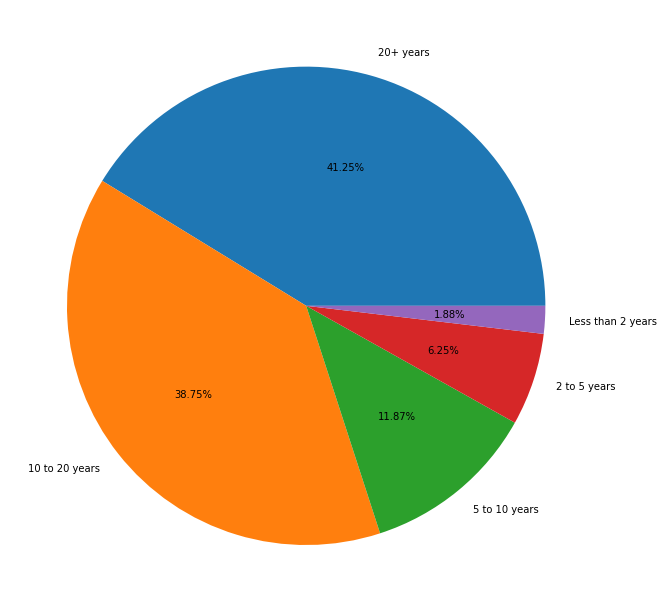

In [63]:
experience = survey.experience.value_counts() 
plt.subplots(figsize=(11,11))
plt.pie(experience.values, labels=experience.index, autopct='%1.2f%%')
plt.show()

In [64]:
experience_per_position = survey.groupby('position').experience.value_counts().sort_values(ascending=False) 
experience_per_position

position                      experience       
Project Manager               10 to 20 years       16
                              20+ years            13
Programmer                    10 to 20 years       13
Architect/Architecture Owner  20+ years            12
Programmer                    20+ years             9
Scrum Master/Team Lead        20+ years             8
                              10 to 20 years        8
IT Manager                    20+ years             8
                              10 to 20 years        6
Architect/Architecture Owner  10 to 20 years        6
Other                         20+ years             6
Programmer                    5 to 10 years         5
Business Analyst              10 to 20 years        4
Other                         10 to 20 years        4
Project Manager               5 to 10 years         3
IT Manager                    5 to 10 years         3
Scrum Master/Team Lead        5 to 10 years         3
QA/Test                       20+ 

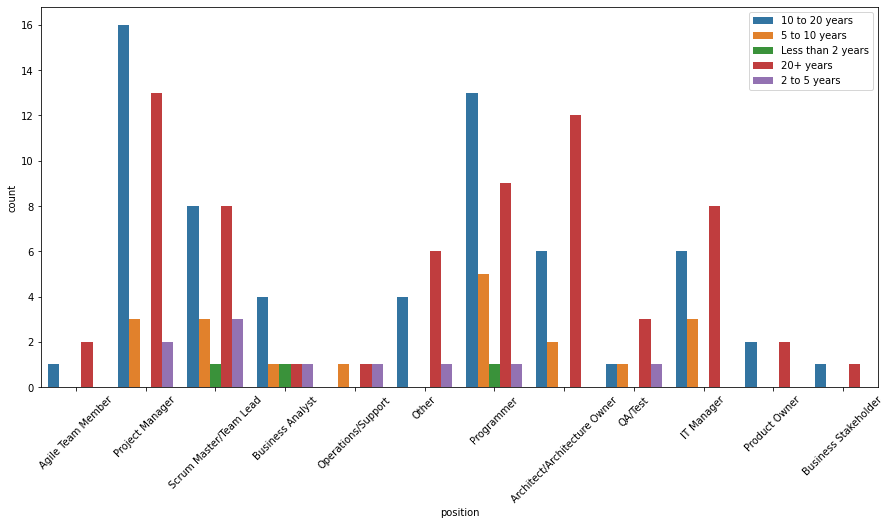

In [65]:
plt.subplots(figsize=(15,7))
chart = sns.countplot(x="position", hue="experience", data=survey)
chart.legend(loc='upper right')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45);

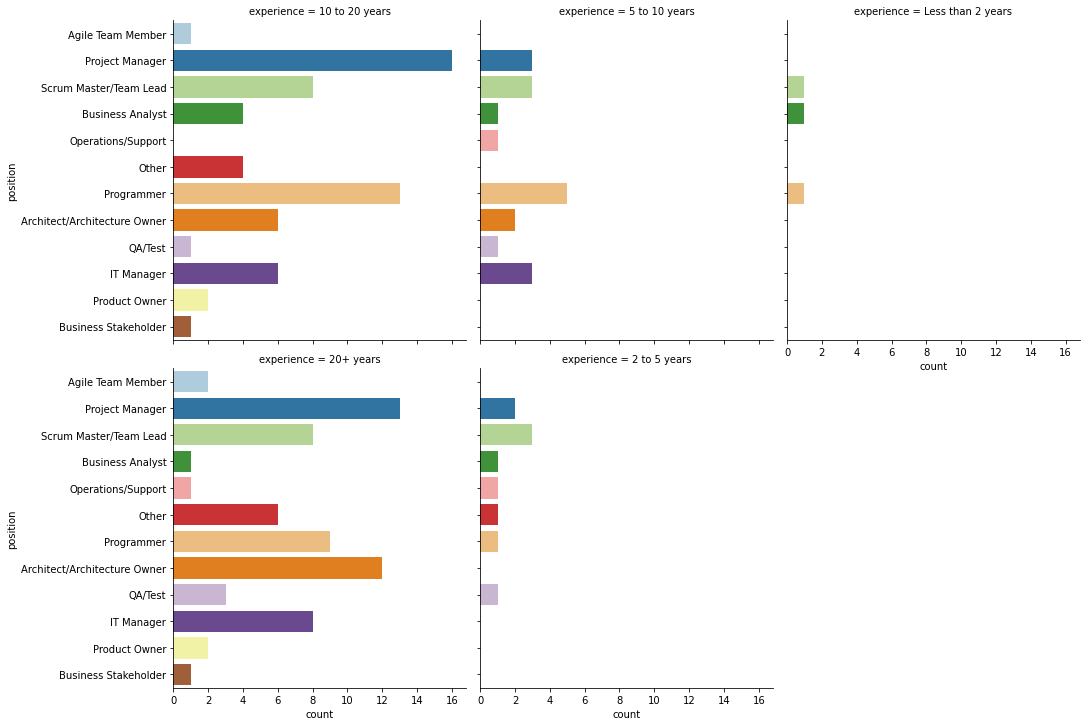

In [66]:
sns.catplot(y="position", data=survey, col="experience", kind="count", col_wrap=3, palette=sns.color_palette('Paired'));

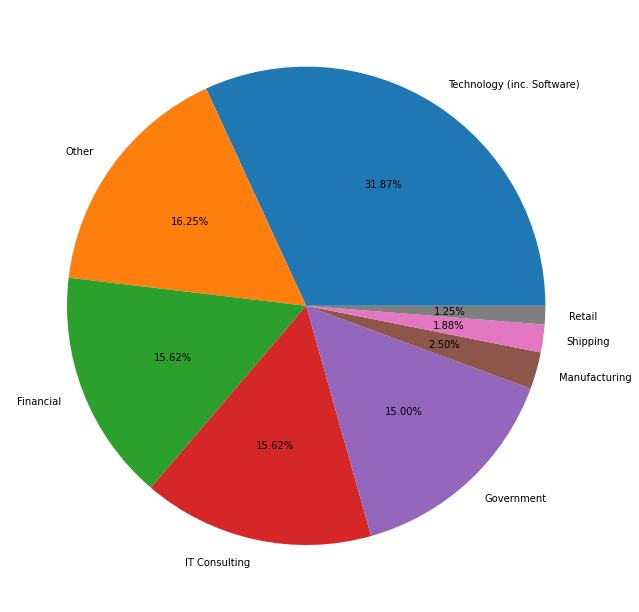

In [67]:
sectors = survey.industry_sector.value_counts() 
plt.subplots(figsize=(11,11))
plt.pie(sectors.values, labels=sectors.index, autopct='%1.2f%%')
plt.show()

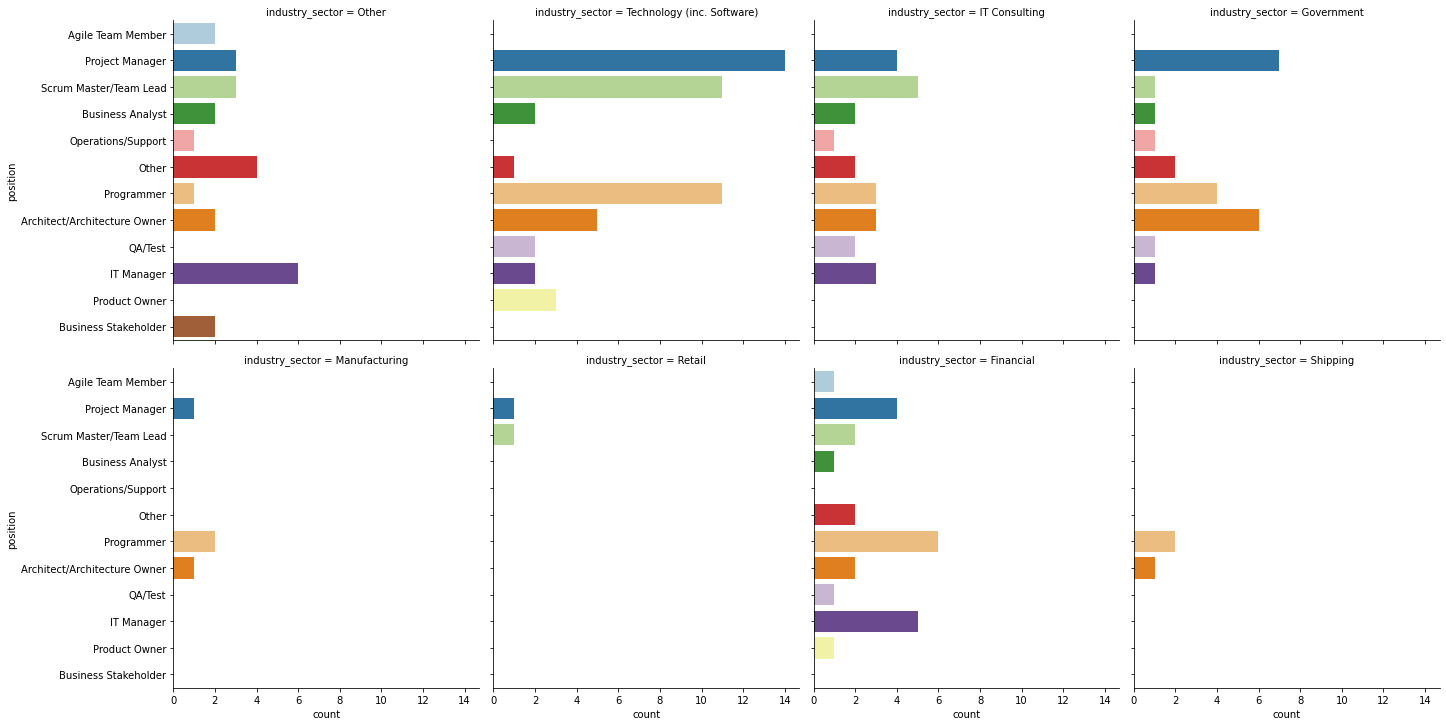

In [68]:
sns.catplot(y="position", data=survey, col="industry_sector", kind="count", col_wrap=4, palette=sns.color_palette('Paired'));

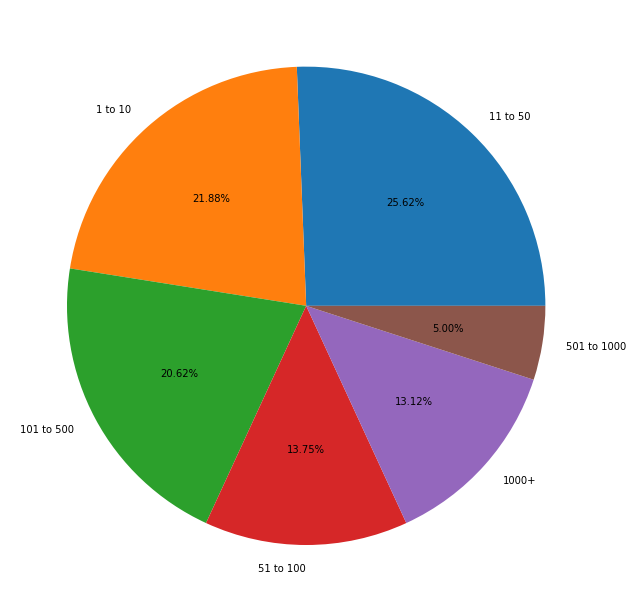

In [69]:
department_size = survey.department_size.value_counts() 
plt.subplots(figsize=(11,11))
plt.pie(department_size.values, labels=department_size.index, autopct='%1.2f%%')
plt.show()

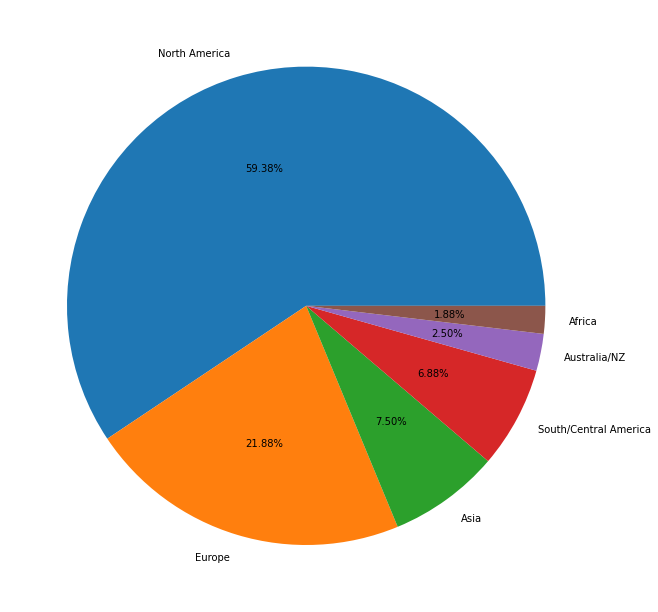

In [70]:
location = survey.location.value_counts() 
plt.subplots(figsize=(11,11))
plt.pie(location.values, labels=location.index, autopct='%1.2f%%')
plt.show()

## Pregled faktora uspešnosti softverskih projekata

In [71]:
print('-------delivery_time_opinion-----------')
delivery_time_opinion = survey['delivery_time_opinion'].value_counts()
print(delivery_time_opinion)
print('\n-------finance_opinion-----------------')
finance_opinion = survey['finance_opinion'].value_counts()
print(finance_opinion)
print('\n------functionality_opinion-----------')
functionality_opinion = survey['functionality_opinion'].value_counts()
print(functionality_opinion)
print('\n-------delivery_quality_opinion--------')
delivery_quality_opinion = survey['delivery_quality_opinion'].value_counts()
print(delivery_quality_opinion)

-------delivery_time_opinion-----------
Delivering on time according to the schedule         86
Delivering when the system is ready to be shipped    73
Not applicable                                        1
Name: delivery_time_opinion, dtype: int64

-------finance_opinion-----------------
Providing good return on investment (ROI)    98
Delivering within budget                     57
Not applicable                                5
Name: finance_opinion, dtype: int64

------functionality_opinion-----------
Meeting the actual needs of stakeholders    138
Building the system to the specification     20
Not applicable                                2
Name: functionality_opinion, dtype: int64

-------delivery_quality_opinion--------
Delivering high quality, easy to maintain systems    92
Delivering systems on time and on budget             64
Not applicable                                        4
Name: delivery_quality_opinion, dtype: int64


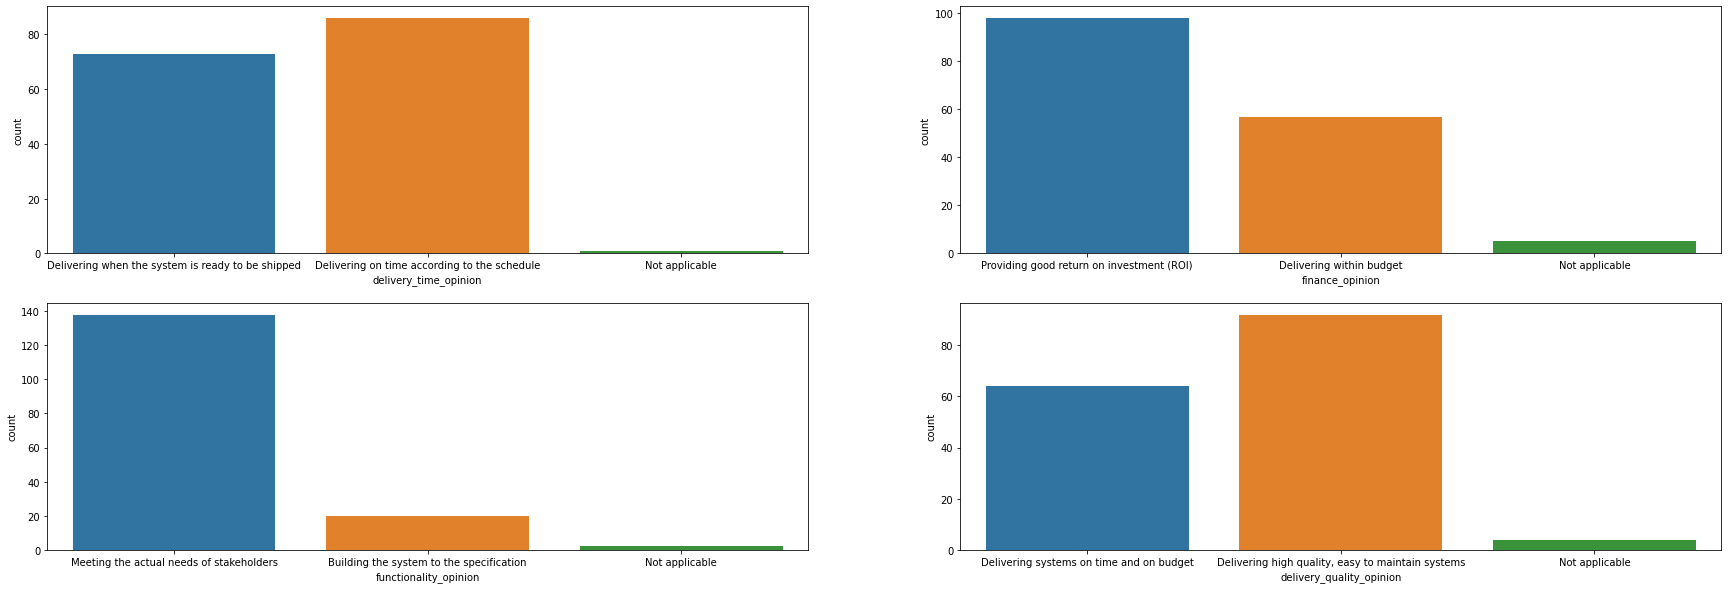

In [72]:
columns = ['delivery_time_opinion', 'finance_opinion', 'functionality_opinion', 'delivery_quality_opinion']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(30, 10))
for i, col in enumerate(columns):
  sns.countplot(x=survey[col],ax=axes[i//2, i%2])
plt.show();

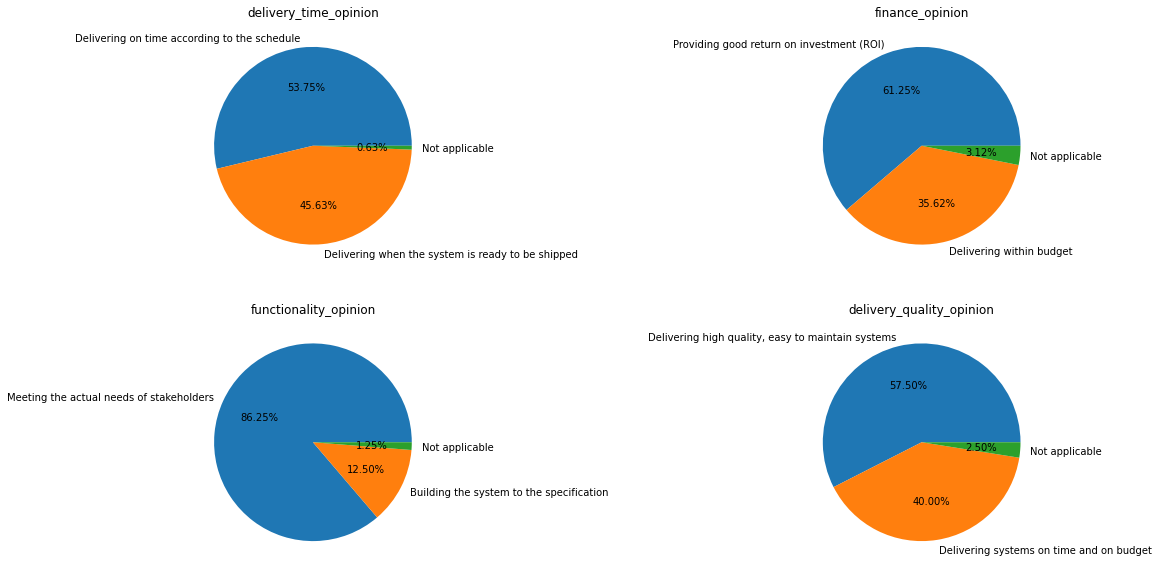

In [73]:
columns = [delivery_time_opinion, finance_opinion, functionality_opinion, delivery_quality_opinion]
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
for i, ax in enumerate(axes.flatten()):
  col = columns[i]
  ax.pie(col.values, labels=col.index, autopct='%.2f%%')
  ax.set_title(col.name)
plt.show();

In [74]:
print('-------priority_stack_time-----------')
priority_stack_time = survey['priority_stack_time'].value_counts()
print(priority_stack_time.sort_values(ascending=False))
print('\n-------priority_stack_money-----------------')
priority_stack_money = survey['priority_stack_money'].value_counts()
print(priority_stack_money.sort_values(ascending=False))
print('\n------priority_stack_functionality-----------')
priority_stack_functionality = survey['priority_stack_functionality'].value_counts()
print(priority_stack_functionality.sort_values(ascending=False))
print('\n-------priority_stack_quality--------')
priority_stack_quality = survey['priority_stack_quality'].value_counts()
print(priority_stack_quality.sort_values(ascending=False))

-------priority_stack_time-----------
Third     47
Second    42
First     36
Fourth    35
Name: priority_stack_time, dtype: int64

-------priority_stack_money-----------------
Fourth    62
Third     47
Second    26
First     25
Name: priority_stack_money, dtype: int64

------priority_stack_functionality-----------
First     58
Second    46
Third     45
Fourth    11
Name: priority_stack_functionality, dtype: int64

-------priority_stack_quality--------
Fourth    52
Second    46
First     41
Third     21
Name: priority_stack_quality, dtype: int64


## Stek prioritetnih faktora uspešnosti

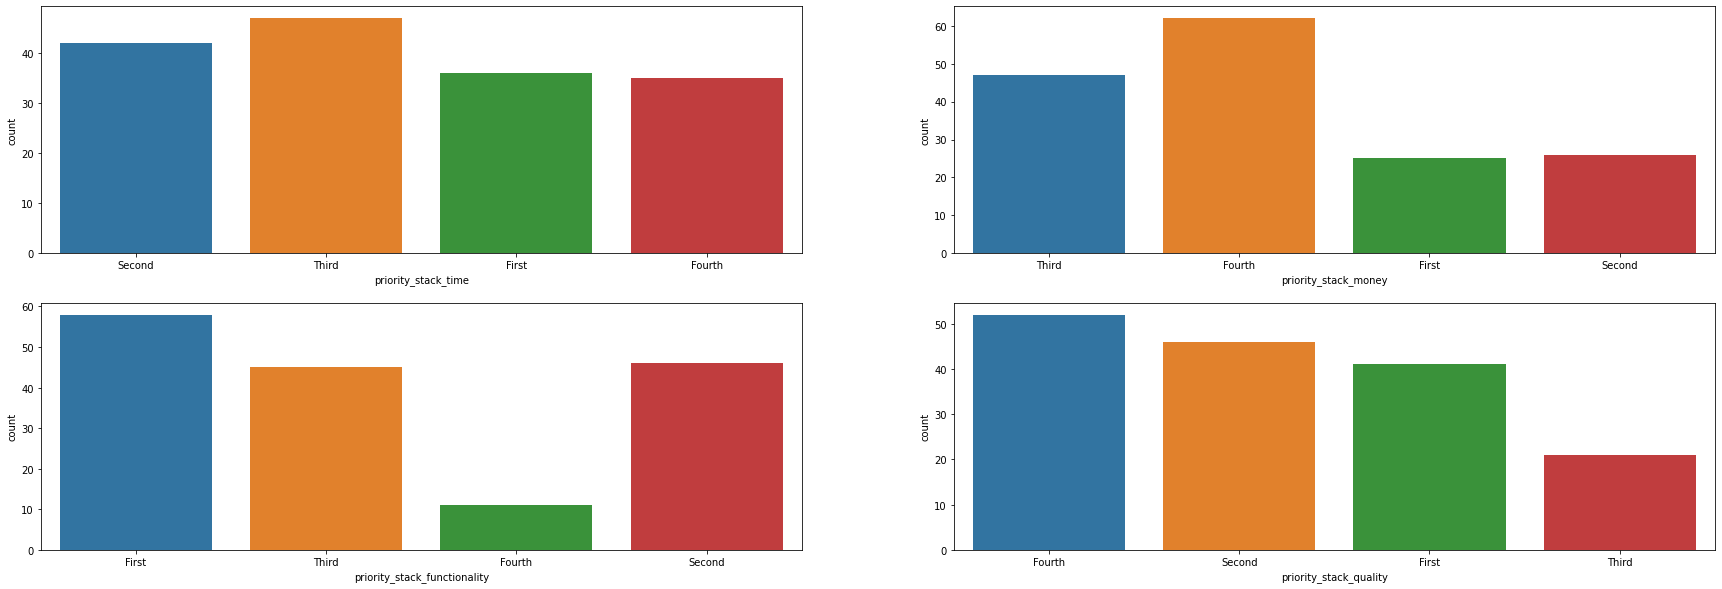

In [75]:
columns = ['priority_stack_time', 'priority_stack_money', 'priority_stack_functionality', 'priority_stack_quality']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(30, 10))
for i, col in enumerate(columns):
  sns.countplot(x=survey[col],ax=axes[i//2, i%2])
plt.show()

In [76]:
print("WM - time: " + str(((priority_stack_time[2] * 4) + (priority_stack_time[1] * 3) + (priority_stack_time[0] * 2) + priority_stack_time[3])/160))
print("WM - money: " + str(((priority_stack_money[3] * 4) + (priority_stack_money[2] * 3) + (priority_stack_money[1] * 2) + priority_stack_money[0])/160))
print("WM - functionality: " + str(((priority_stack_functionality[0] * 4) + (priority_stack_functionality[1] * 3) + (priority_stack_functionality[2] * 2) + priority_stack_functionality[3])/160))
print("WM - quality: " + str(((priority_stack_quality[2] * 4) + (priority_stack_quality[1] * 3) + (priority_stack_quality[3] * 2) + priority_stack_quality[0])/160))

WM - time: 2.49375
WM - money: 2.0875
WM - functionality: 2.94375
WM - quality: 2.475


## Uspešnosti softverskih projekata u odnosu na primenjenu metodologiju razvoja

In [77]:
survey.columns

Index(['position', 'experience', 'department_size', 'industry_sector',
       'location', 'delivery_time_opinion', 'finance_opinion',
       'functionality_opinion', 'delivery_quality_opinion',
       'priority_stack_time', 'priority_stack_money',
       'priority_stack_functionality', 'priority_stack_quality',
       'adhoc_successful', 'adhoc_challenged', 'adhoc_failed',
       'iterative_successful', 'iterative_challenged', 'iterative_failed',
       'agile_successful', 'agile_challenged', 'agile_failed',
       'traditional_succesful', 'traditional_challenged',
       'traditional_failed'],
      dtype='object')

In [78]:
adhoc_successful = survey.adhoc_successful.value_counts()
adhoc_challenged = survey.adhoc_challenged.value_counts()
adhoc_failed = survey.adhoc_failed.value_counts()

print("AdHoc - succesful")
print(adhoc_successful)
print("\n AdHoc - challenged")
print(adhoc_challenged)
print("\n AdHoc - failed")
print(adhoc_failed)


AdHoc - succesful
Don't Know    45
61-70%        15
41-50%        14
91-100%       13
31-40%        13
51-60%        13
81-90%        13
11-20%        12
21-30%         8
71-80%         6
1-10%          4
0              4
Name: adhoc_successful, dtype: int64

 AdHoc - challenged
Don't Know    44
1-10%         18
41-50%        16
21-30%        16
31-40%        13
51-60%        12
71-80%        10
61-70%        10
11-20%        10
81-90%         5
91-100%        4
0              2
Name: adhoc_challenged, dtype: int64

 AdHoc - failed
Don't Know    42
1-10%         39
0             21
11-20%        18
21-30%        14
31-40%         7
41-50%         5
61-70%         5
51-60%         5
81-90%         3
71-80%         1
Name: adhoc_failed, dtype: int64


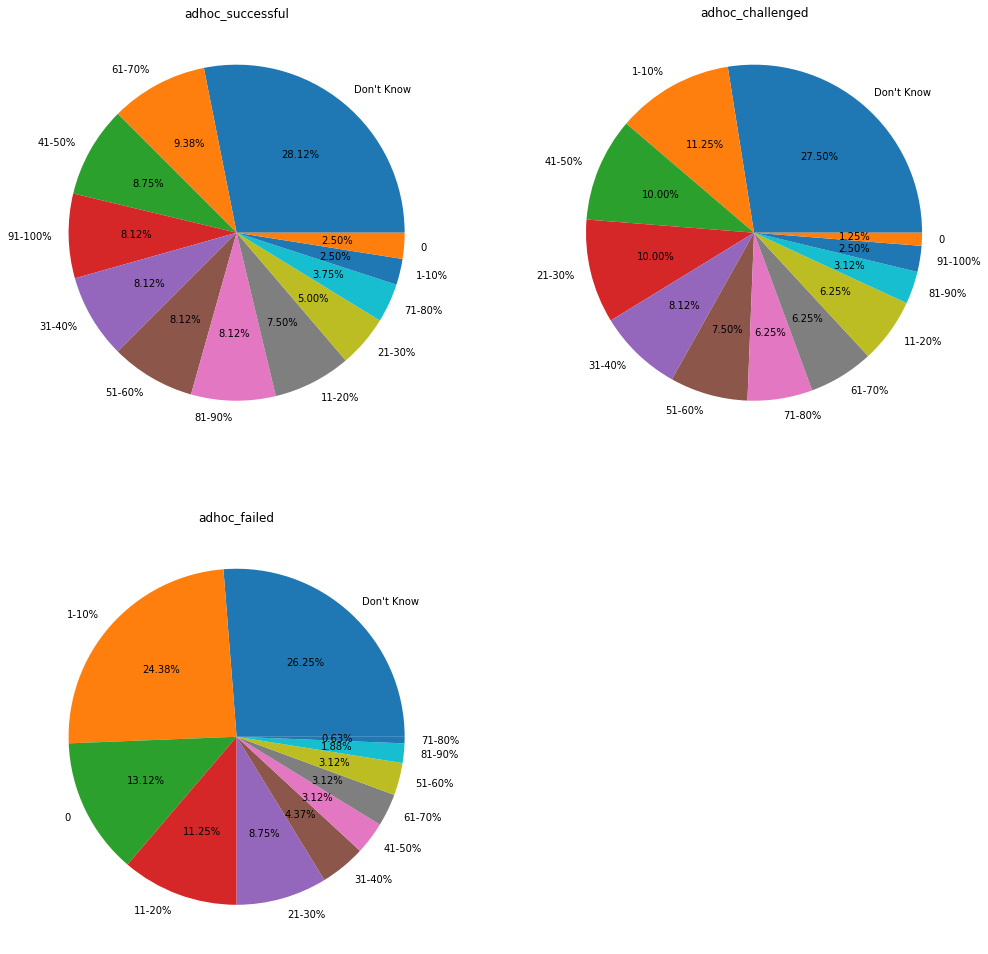

In [91]:
data = [adhoc_successful, adhoc_challenged, adhoc_failed]
fig = plt.figure(figsize=(17,17))
rows = 2
cols = 2
for i, feature in enumerate(data):
  fig.add_subplot(rows, cols, i+1)
  plt.pie(feature.values, labels=feature.index, autopct='%.2f%%')
  plt.title(feature.name)
plt.show()

In [80]:
iterative_successful = survey.iterative_successful.value_counts()
iterative_challenged = survey.iterative_challenged.value_counts()
iterative_failed = survey.iterative_failed.value_counts()

print("Iterative - succesful")
print(iterative_successful)
print("\n Iterative - challenged")
print(iterative_challenged)
print("\n Iterative - failed")
print(iterative_failed)

Iterative - succesful
Don't Know    39
71-80%        27
81-90%        26
91-100%       20
61-70%        12
51-60%        10
21-30%         7
41-50%         6
31-40%         5
1-10%          3
0              3
11-20%         2
Name: iterative_successful, dtype: int64

 Iterative - challenged
Don't Know    46
1-10%         24
11-20%        24
21-30%        18
31-40%        12
51-60%         9
61-70%         7
41-50%         6
81-90%         6
0              3
71-80%         3
91-100%        2
Name: iterative_challenged, dtype: int64

 Iterative - failed
Don't Know    45
0             44
1-10%         36
11-20%        16
21-30%         6
31-40%         5
51-60%         4
41-50%         2
81-90%         1
61-70%         1
Name: iterative_failed, dtype: int64


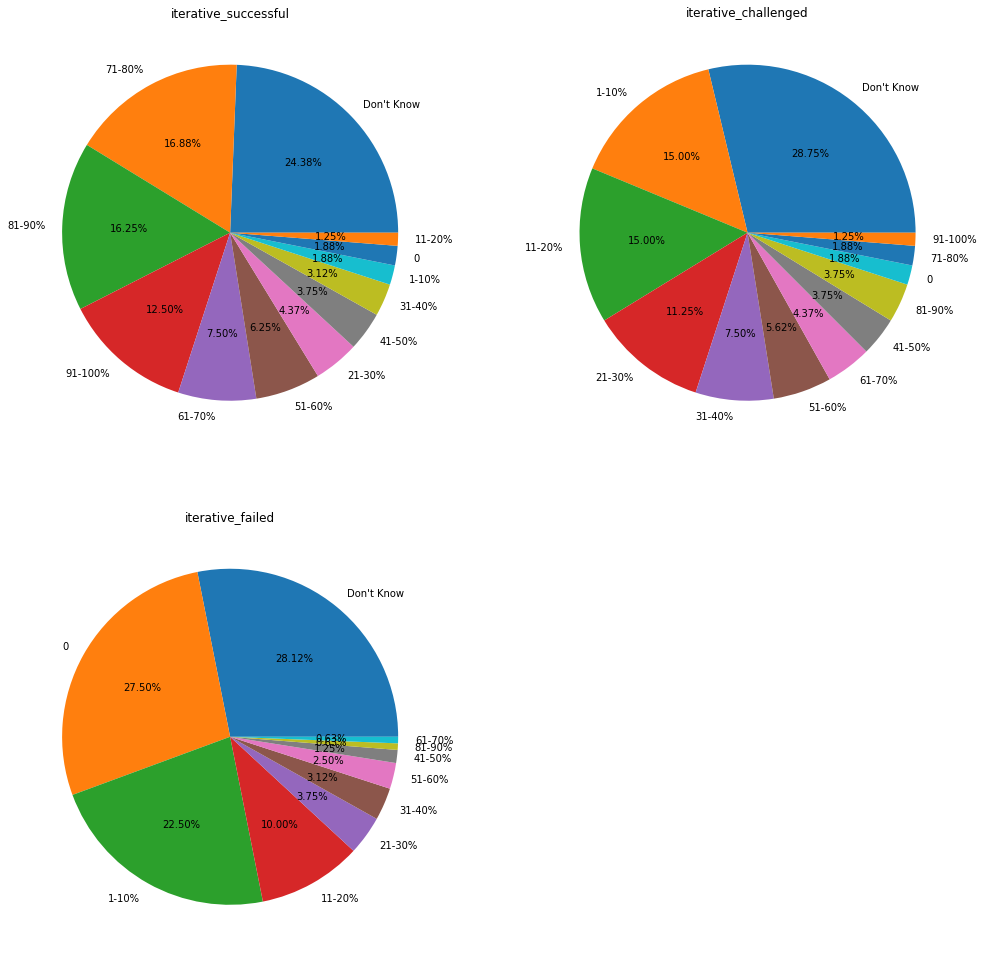

In [86]:
data = [iterative_successful, iterative_challenged, iterative_failed]
fig = plt.figure(figsize=(17,17))
rows = 2
cols = 2
for i, feature in enumerate(data):
  fig.add_subplot(rows, cols, i+1)
  plt.pie(feature.values, labels=feature.index, autopct='%.2f%%')
  plt.title(feature.name)
plt.show()

In [82]:
agile_successful = survey.agile_successful.value_counts()
agile_challenged = survey.agile_challenged.value_counts()
agile_failed = survey.agile_failed.value_counts()

print("Agile - succesful")
print(agile_successful)
print("\n Agile - challenged")
print(agile_challenged)
print("\n Agile - failed")
print(agile_failed)

Agile - succesful
Don't Know    63
91-100%       21
81-90%        17
71-80%        13
0             13
41-50%        11
61-70%         8
51-60%         6
21-30%         3
1-10%          2
11-20%         2
31-40%         1
Name: agile_successful, dtype: int64

 Agile - challenged
Don't Know    64
1-10%         19
0             17
11-20%        13
41-50%        12
21-30%         8
31-40%         7
91-100%        6
61-70%         6
71-80%         4
51-60%         3
81-90%         1
Name: agile_challenged, dtype: int64

 Agile - failed
Don't Know    67
0             48
1-10%         20
11-20%         8
21-30%         5
51-60%         4
71-80%         3
41-50%         2
91-100%        2
31-40%         1
Name: agile_failed, dtype: int64


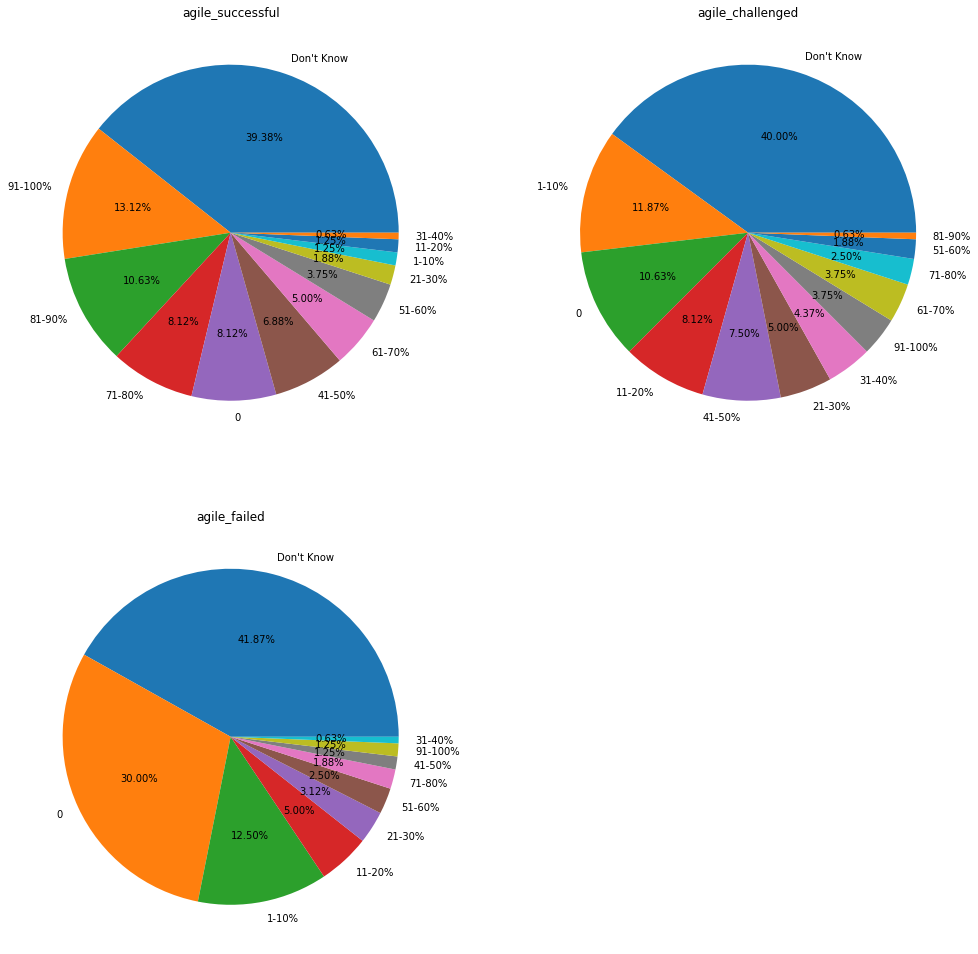

In [89]:
data = [agile_successful, agile_challenged, agile_failed]
fig = plt.figure(figsize=(17,17))
rows = 2
cols = 2
for i, feature in enumerate(data):
  fig.add_subplot(rows, cols, i+1)
  plt.pie(feature.values, labels=feature.index, autopct='%.2f%%')
  plt.title(feature.name)
plt.show()

In [84]:
traditional_successful = survey.traditional_succesful.value_counts()
traditional_challenged = survey.traditional_challenged.value_counts()
traditional_failed = survey.traditional_failed.value_counts()

print("Traditional - succesful")
print(traditional_successful)
print("\n Traditional - challenged")
print(traditional_challenged)
print("\n Traditional - failed")
print(traditional_failed)

Traditional - succesful
Don't Know    38
71-80%        18
61-70%        16
21-30%        14
41-50%        12
31-40%        12
81-90%        11
51-60%        11
91-100%       10
11-20%         9
0              7
1-10%          2
Name: traditional_succesful, dtype: int64

 Traditional - challenged
Don't Know    39
51-60%        21
21-30%        18
31-40%        16
11-20%        14
41-50%        13
1-10%         11
71-80%         9
61-70%         8
91-100%        6
0              3
81-90%         2
Name: traditional_challenged, dtype: int64

 Traditional - failed
1-10%         43
Don't Know    42
0             26
11-20%        15
21-30%         8
41-50%         6
31-40%         6
71-80%         4
61-70%         4
81-90%         3
51-60%         3
Name: traditional_failed, dtype: int64


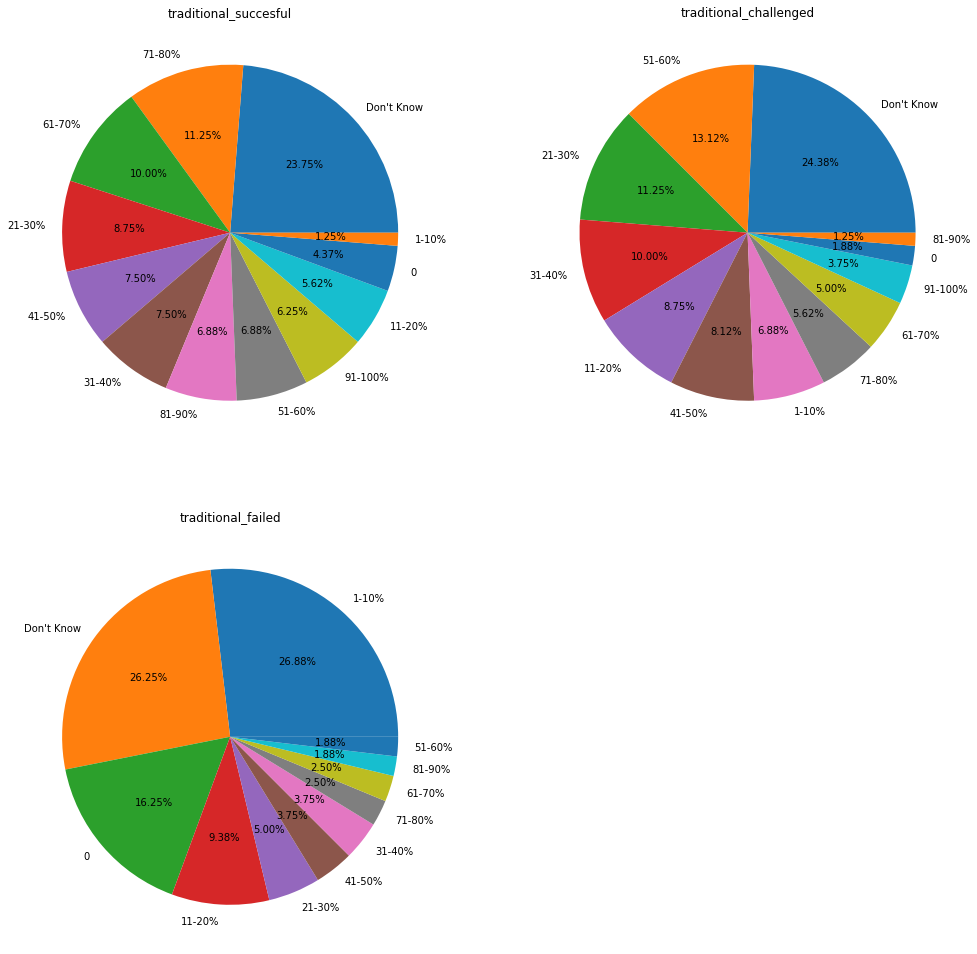

In [90]:
data = [traditional_successful, traditional_challenged, traditional_failed]
fig = plt.figure(figsize=(17,17))
rows = 2
cols = 2
for i, feature in enumerate(data):
  fig.add_subplot(rows, cols, i+1)
  plt.pie(feature.values, labels=feature.index, autopct='%.2f%%')
  plt.title(feature.name)
plt.show()

In [210]:
columns =  ['adhoc_successful', 'adhoc_challenged', 'adhoc_failed',
       'iterative_successful', 'iterative_challenged', 'iterative_failed',
       'agile_successful', 'agile_challenged', 'agile_failed',
       'traditional_succesful', 'traditional_challenged',
       'traditional_failed']

data = []
for col in columns:
  helper = survey[survey[col] != "Don't Know"]
  data.append({'count': helper[col].count(), 'valueCount' : helper[col].value_counts(sort=True)})

In [211]:
# Moglo je elegantnije, ali nisam imao vremena...
def calcWeightSum(x):
  switcher = {
    0: 1,
    '1-10%': 2, 
    '11-20%': 3,
    '21-30%': 4, 
    '31-40%': 5, 
    '41-50%': 6, 
    '51-60%': 7,  
    '61-70%': 8,
    '71-80%': 9,  
    '81-90%': 10, 
    '91-100%': 11, 
  }

  length = len(x.index)
  
  i = 0
  sum = 0
  while i < length:
    sum += x.values[i] * switcher.get(x.index[1], 1)
    i += 1
  
  return sum

wAvgMean = {}
i = 0 
while i < len(data):
  wAvgMean.update({data[i]['valueCount'].name: (calcWeightSum(data[i]['valueCount'])/data[i]['count'])})
  i += 1

,0,1
0,adhoc_successful,6.0
1,adhoc_challenged,6.0
2,adhoc_failed,1.0
3,iterative_successful,10.0
4,iterative_challenged,3.0
5,iterative_failed,2.0
6,agile_successful,10.0
7,agile_challenged,1.0
8,agile_failed,2.0
9,traditional_succesful,8.0


In [217]:
adhoc = {} 
agile = {}
traditional = {}
iterative = {}
for k, v in wAvgMean.items():
  if 'adhoc' in k:
    adhoc.update({k:v})
  elif 'agile' in k:
    agile.update({k:v})
  elif 'traditional' in k:
    traditional.update({k:v})
  elif 'iterative' in k:
    iterative.update({k:v})

agileDF = pd.DataFrame.from_dict(list(agile.items()))    
adhocDF = pd.DataFrame.from_dict(list(adhoc.items()))    
traditionalDF = pd.DataFrame.from_dict(list(traditional.items()))    
iterativeDF = pd.DataFrame.from_dict(list(iterative.items()))

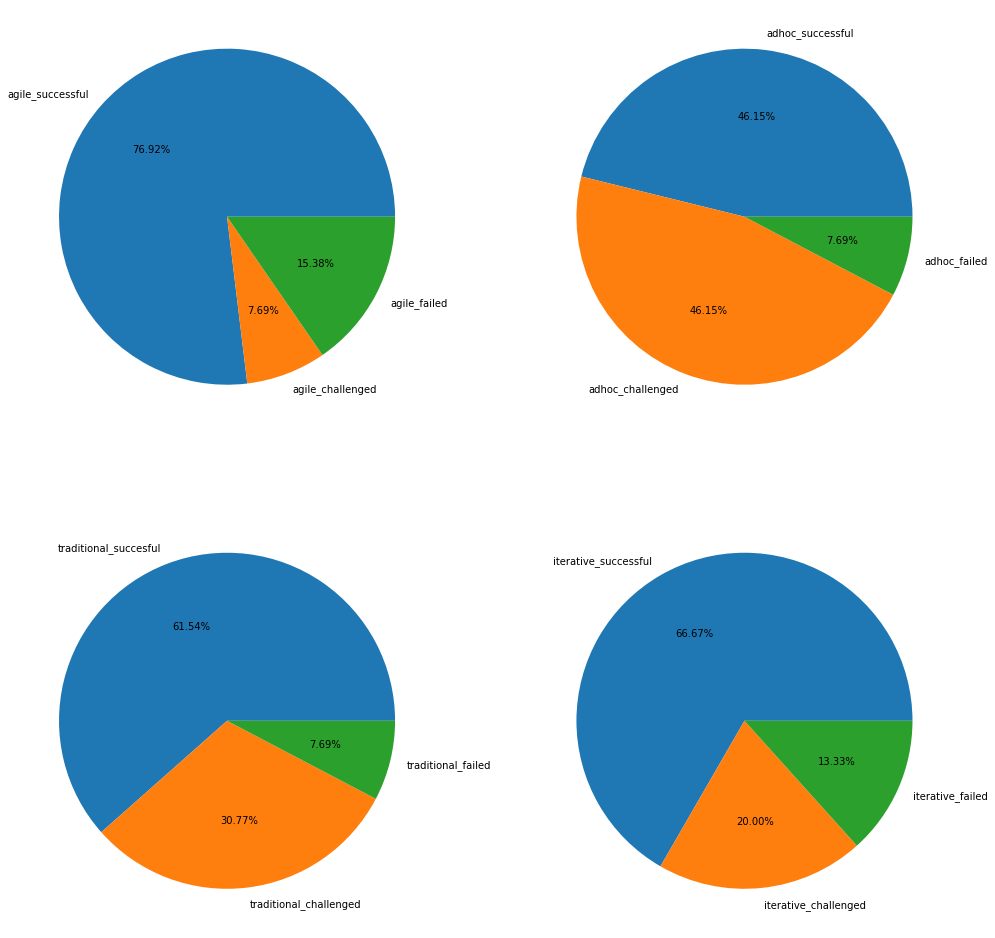

In [220]:
data = [agileDF, adhocDF, traditionalDF, iterativeDF]
fig = plt.figure(figsize=(17,17))
rows = 2
cols = 2
for i, feature in enumerate(data):
  fig.add_subplot(rows, cols, i+1)
  plt.pie(feature[1], labels=feature[0], autopct='%.2f%%')
plt.show()